# INTRODUCTION

IN THIS PROJECT WE WILL STUDY DATA FROM THE WORLD BANK GROUP 

PARTICULARLY THE EDUCATION STATISTICS. 

IN ORDER TO SELECT THE FOREIGN COUNTRIES WHERE ACADEMY GROUP COULD EXPAND 


# PART 1 : FILES ANALYSIS

In [1]:
# IMPORT OF REQUIRED LIBRARIES 
import numpy as np # FOR NUMERICAL COMPUTATIONS
import pandas as pd # FOR DATA MANIPULATION AND ANALYSIS
import matplotlib.pyplot as plt # FOR DATA VISUALIZATION

import seaborn as sns # FOR STATISTICAL DATA VISUALIZATION

## ***<u> P1 - 1) EdStatsCountry FILE</u>***

In [2]:
# PATH DEFINITION
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsCountry.csv'

In [3]:
# DATAFRAME CREATION
Fichier_Country = pd.read_csv(path)

In [4]:
# FIRST ROWS OF THE DATAFRAME
Fichier_Country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


AT FIRST GLANCE, THIS DATAFRAME APPEARS TO BE ORDERED ALPHABETICALLY BY "Country Code"

THERE ARE 32 COLUMNS INCLUDING "Country Code" AND DIFFERENT COUNTRY NAME FORMATS(SHORT, TABLE, LONG), AMONG OTHERS

In [5]:
# TAKE A CLOSER LOOK AT THIS DATAFRAME
Fichier_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [6]:
Original_Column_Numbers = 32
Original_Row_Numbers = 241

THIS FILE CONTAINS 241 ROWS INDEXED FROM 0 TO 240 AND 32 COLUMNS NUMBERED FROM 0 TO 31. THERE'S 4 FLOAT-TYPE COLUMNS AND 28 OBJECT-TYPE COLUMNS(STRING). 

WE CAN OBSERVE THAT :

¤ COLUMN N° 31 (Unnamed: 31) IS EMPTY, THERE'S 0 NON NULL VALUES. 

¤ SOME COLUMNS, LIKE N°16 (Alternative conversion factor) OR N°11 (National accounts reference year) ARE SPARSELY FILLED.

¤ OTHERS, SUCH AS N°5 (Currency Unit) ARE NEARLY COMPLETELY FILLED.

¤ FINALLY, COLUMNS LIKE N°1 (Short Name) ARE ENTIRELY FILLED. 

In [7]:
# FIRST, WE WILL ONLY KEEP COUNTRIES WITH INFORMATIONS IN THE "VITAL REGISTRTION COMPLETE" COLUMN.
# THIS COLUMN INDICATE WHETHER BIRTH, DEATH, MARRIAGES, AND OTHER EVENTS ARE WELL-REGISTERED.
# THIS SEEMS TO BE A GOOD CRITERION FOR OBTAINING RELIABLE INFORMATION.
Fichier_Country=Fichier_Country.loc[(Fichier_Country['Vital registration complete']=='Yes. Vital registration for Guernsey and Jersey.') | 
                                    (Fichier_Country['Vital registration complete']=='Yes')]
Kept_Rows=Fichier_Country.shape[0]
print(f"At this step, we've eliminated {round(100-Kept_Rows*100/Original_Row_Numbers,2)} % of the rows")

At this step, we've eliminated 53.94 % of the rows


In [8]:
# REMOVE COLUMNS CONTAINING MORE THAN 30% NAN VALUES

Liste_à_drop = []
for features in Fichier_Country.columns:
    if Fichier_Country[features].isnull().sum()>0.3*Fichier_Country.shape[0]:
        Liste_à_drop.append(features)
print("Columns to be dropped:")
for col in Liste_à_drop:
    print(col)
Fichier_Country=Fichier_Country.drop(Liste_à_drop,axis=1)
print()
print(f"At this step, we've eliminated {round(len(Liste_à_drop)*100/Original_Column_Numbers,2)} % of the columns")


Columns to be dropped:
Special Notes
National accounts reference year
Lending category
Other groups
Alternative conversion factor
PPP survey year
External debt Reporting status
Latest household survey
Source of most recent Income and expenditure data
Latest agricultural census
Latest industrial data
Unnamed: 31

At this step, we've eliminated 37.5 % of the columns


## ***<u> P1 - 2) EdStatsCountry-Series FILE</u>***


In [9]:
# PATH DEFINITION
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsCountry-Series.csv'

In [10]:
# DATAFRAME CREATION
Fichier_Country_Series = pd.read_csv(path)

In [11]:
# FIRST ROWS OF THE DATAFRAME
Fichier_Country_Series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


THERE ARE 4 COLUMNS IN THIS DATAFRAME

THE "DESCRIPTION" COLUMNS PROVIDES INFORMATION ABOUT THE STATISTICS. SOME DATA COME FROM THE UN, WHILE OTHERS ARE ESTIMATES.

In [12]:
# TAKE A CLOSER LOOK AT THIS DATAFRAME
Fichier_Country_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


THIS DATAFRAME CONTAINS 613 ROWS INDEXED FROM 0 TO 612 AND 4 COLUMNS NUMBERED FROM 0 TO 3. 

IT COMPRISES 1 FLOAT-TYPE COLUMN AND 3 OBJECT-TYPE (STRING).

WE CAN SEE THAT "Unnamed: 3" COLUMN IS EMPTY. THE OTHER THREE ONES ARE FULLY FILLED.

In [13]:
# REMOVE Unnamed: 3

Fichier_Country_Series=Fichier_Country_Series.drop(['Unnamed: 3'],axis=1)
print(f"At this step, we've eliminated 25 % of the columns")

At this step, we've eliminated 25 % of the columns


## ***<u> P1 - 3) EdStatsData FILE</u>***

In [14]:
# PATH DEFINITION
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsData.csv'

In [15]:
# DATAFRAME CREATION
Fichier_Data = pd.read_csv(path)

In [16]:
# FIRST ROWS OF THE DATAFRAME
Fichier_Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


THIS DATAFRAME CONTAINS 70 COLUMNS, INCLUDING ONE FOR "Country Code" 

TWO COLUMNS, "Indicator Name" AND "Indicator Code", RELATE TO THE INDICATOR BEING STUDIED

THE LAST COLUMN NAMED "Unnamed: 69" LIKELY EMPTY

THE REMAINING 65 COLUMNS  REPRESENT DIFFERENT YEARS, CONTAINING VLAUES FOR THE INDICATOR SPECIFIED IN "Indicator Name". YEARS ARE REPRESENTED ANNUALLY FROM 1970 TO 2017 (INCLUSIVE), THEN IN 5-YEARS INTERVAL FROM 2020 TO 2100 (INCLUSIVE).




In [17]:
# TAKE A CLOSER LOOK AT THIS DATAFRAME
Fichier_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

THIS DATAFRAME CONTAINS 886930 ROWS INDEXED FROM 0 TO 886929 AND 70 COLUMNS NUMBERED FROM 0 TO 69. 

IT COMPRISES 66 FLOAT-TYPE COLUMNS AND 4 OBJECT-TYPE(STRING). 

COLUMN N° 69 "Unnamed: 69" IS EMPTY.

COLUMN N°51 REPRESENTING THE YEAR 2017 IS NEARLY EMPTY (ONLY 143 NON-NULL VALUES OUT OF 886,930).

THE PERIOD FROM 2000 TO 2017 (INCLUSIVE) APPEARS TO BE THE MOST COMPLETELY FILLED 

COLUMNS N°52 TO N°68, REPRESENTING YEARS 2020 TO 2100, ALL HAVE 51436 NON-NAN VALUES (WE CAN ASSUME THESE ARE PROJECTIONS)


## ***<u> P1 - 4) EdStatsFootNote FILE</u>***

In [18]:
# PATH DEFINITION
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsFootNote.csv'

In [19]:
# DATAFRAME CREATION
Fichier_FootNote = pd.read_csv(path)

In [20]:
# FIRST ROWS OF THE DATAFRAME
Fichier_FootNote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


THIS DATAFRAME CONTAINS 5 COLUMS, INCLUDING "CountryCode"

THE OTHER COLUMNS, EXCEPT FOR THE LAST ONE, PROVIDES INFORMATION ABOUT THE VALUES, THEIR COLLECTION METHOD (ESTIMATION OR SURVEY) AND THE YEAR INVOLVED.

THE LAST COLUMN NAMED "Unnamed: 4" IS LIKELY EMPTY


In [21]:
# TAKE A CLOSER LOOK AT THIS DATAFRAME
Fichier_FootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


THIS DATAFRAME CONTAINS 643638 ROWS INDEXED FROM 0 TO 643637 AND 5 COLUMNS NUMBERED FROM 0 TO 4. 

IT COMPRISES 1 FLOAT-TYPE COLUMN AND 4 OBJECT-TYPE (STRING).

WE CAN OBSERVE THAT THE LAST COLUMN IS EMPTY WHILE THE OTHERS ARE COMPLETELY FILLED

In [22]:
# REMOVE Unnamed: 4

Fichier_FootNote=Fichier_FootNote.drop(['Unnamed: 4'],axis=1)
print("At this step we've eliminated 20 % of the columns")

At this step we've eliminated 20 % of the columns


## ***<u> P1 - 5) EdStatsSeries FILE</u>***

In [23]:
# PATH DEFINITION
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsSeries.csv'

In [24]:
# DATAFRAME CREATION
Fichier_Series = pd.read_csv(path)

In [25]:
# FIRST ROWS OF THE DATAFRAME
Fichier_Series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


THIS FILE CONTAINS INFORMATIONS ABOUT THE METHODOLOGY AND PAPERS USED TO GET VALUES

In [26]:
# TAKE A CLOSER LOOK AT THIS DATAFRAME
Fichier_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

THIS DATAFRAME CONTAINS 3665 LINES INDEXED FROM 0 TO 3664 AND 21 COLUMNS NUMBERED FROM 0 TO 20. 

IT COMPRISES 6 FLOAT-TYPE COLUMNS AND 15 OBJECT-TYPE (STRING).

WE CAN OBSERVE THAT ALL FLOAT-TYPE COLUMNS ARE EMPTY

# CONCLUSION OF PRELIMINARY ANALYSIS

ONLY ONE FILE APPEARS TO BE USEFUL FOR OUR STUDY : THE DATAFRAME NAMED 'Fichier_Data'.

# PART 2 : FEATURES SELECTION AND DATA ANALYSIS

## DATA SELECTION

TO MITIGATE ISSUES WITH MISSING VALUES, WE WILL CALCULATE THE MEAN OF THE VALUES FROM 2011 TO 2015 (INCLUDSIVE) AND STORE IT IN A NEW FEATURE NAMED 'Periode 2011-2015'

In [27]:
# MEAN OF THE VALUES FROM 2011 TO 2015 (INCLUSIVE)
Fichier_Data['Periode 2011-2015']=Fichier_Data[['2011', '2012', '2013', '2014', '2015']].mean(axis=1)
Fichier_Data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Periode 2011-2015
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183071.500000
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.679410
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.656455
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.046085
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.591220


### PIVOT TABLE

In [28]:
# CREATE A PIVOT TABLE WITH 'Country Code' AS INDEX NAD INDICATORS AS COLUMNS
# EACH INDICATOR PRESENT IN THE "INDICATOR NAME" COLUMN OF Fichier_Data BECOME A COLUMN 
# THE VALUES ARE FILLED WITH DATA FROM THE "PERIODE 2011-2015" COLUMN

DF_pivot=Fichier_Data.pivot(index='Country Code',columns='Indicator Name',values='Periode 2011-2015')
DF_pivot=DF_pivot.reset_index()

DF_pivot


Indicator Name,Country Code,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,ABW,78.047157,82.111633,1.108400,74.081360,99.307243,99.427483,1.002370,99.191917,58.249889,...,5.01,12.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,49.032011,35.857401,0.582715,61.497005,NaN,NaN,NaN,NaN,31.874825,...,NaN,NaN,62.453490,2947366.00,1840733.0,1106633.0,46.990050,32.113220,0.518970,61.879070
2,AGO,NaN,NaN,NaN,NaN,84.012306,73.047318,0.769500,94.928574,NaN,...,NaN,NaN,66.264950,1047558.00,694164.0,353394.0,77.431130,70.585130,0.831760,84.862380
3,ALB,88.222420,87.744015,0.989560,88.671955,95.299061,94.326884,0.984623,95.798124,68.868717,...,513.24,1030.33,51.844640,5424.50,2733.5,2691.0,99.011295,98.938215,0.998840,99.053670
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,47.808900,0.00,0.0,0.0,100.000000,100.000000,1.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,YEM,43.159821,34.723160,0.677170,51.277050,85.120102,77.733551,0.842990,92.212486,27.361885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5880.03,11703.48,34.280522,119946.25,41094.5,78852.0,98.877440,99.184065,1.006198,98.573375
240,ZMB,NaN,NaN,NaN,NaN,90.392649,91.600863,1.026913,89.196421,NaN,...,634.93,953.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


WE NOW HAVE A DATAFRAME CONTAINING 242 ROWS (ONE FOR EACH COUNTRY CODE) AND 3,666 COLUMNS (ONE FOR EACH INDICATOR)

LET'S PERFORM A QUICK CHECK OF THE VALUES

In [29]:
Fichier_Data.loc[(Fichier_Data['Indicator Name']=='Adjusted net intake rate to Grade 1 of primary education, both sexes (%)') 
                  & (Fichier_Data['Country Code']=='ZMB'),'Periode 2011-2015']

879612    61.57795
Name: Periode 2011-2015, dtype: float64

In [30]:
DF_pivot.loc[DF_pivot['Country Code']=='ZMB','Adjusted net intake rate to Grade 1 of primary education, both sexes (%)']

240    61.57795
Name: Adjusted net intake rate to Grade 1 of primary education, both sexes (%), dtype: float64

THE VALUES ARE CONSISTENT. EXCELLENT, WE CAN PROCEED WITH THE NEXT STEPS

### DATA VISUALIZATION

In [31]:
# CALCULATE THE PERCENTAGE OF NAN-VALUES IN EACH COLUMNS
POURCENTAGE_NAN = DF_pivot.isnull().mean() * 100

In [32]:
# SET THE ACCEPTABLE THRESHOLD FOR NAN PERCENTAGE 
limite = 10

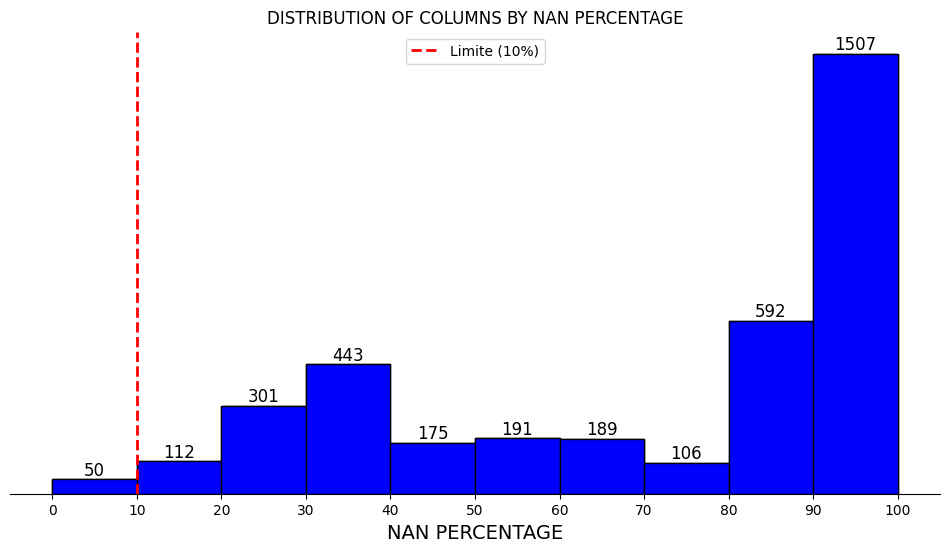

In [33]:
# HISTOGRAM VISUALIZATION OF NAN PERCENTAGE
plt.figure(figsize=(12, 6))
plt.hist(POURCENTAGE_NAN, bins=10, edgecolor='black',color='blue')

plt.axvline(limite, color='r', linestyle='--', linewidth=2, label=f'Limite ({limite}%)')
plt.title("DISTRIBUTION OF COLUMNS BY NAN PERCENTAGE")
plt.xlabel("NAN PERCENTAGE",fontsize=14)
plt.xticks(np.arange(0,101,10))

plt.legend()

ax=plt.gca() # TO CREATE AX OBJECT IN ORDER TO MODIFY AXES

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

patches=plt.hist(POURCENTAGE_NAN, bins=10, edgecolor='black',color='blue')[2] # BAR COLLECTION RETURNED BY plt.hist

ax.bar_label(patches, label_type='edge', fontsize=12)

ax.yaxis.set_visible(False)
plt.show()



WE CAN OBSERVE THAT MANY OF INDICATORDS ARE POORLY FILLED

FROM THIS POINT FORWARD, WE WILL FOCUS ON 4 KEY INDICATORS:

"GDP, PPP (current international $)"

"Internet users (per 100 people)"

"Unemployment, total (% of total labor force)"

"Population Cible" (CREATED COLUMN FROM ENROLMENT IN SECONDARY EDUCATION AND TERTIARY EDUCATION)



## CREATION OF A DATAFRAME WITH SELECTED INDICATORS

In [34]:
DF_pivot['Population Cible']=DF_pivot[['Enrolment in secondary education, both sexes (number)',
                                           'Enrolment in secondary general, both sexes (number)',
                                           'Enrolment in secondary vocational, both sexes (number)',
                                           'Enrolment in tertiary education, all programmes, both sexes (number)']].sum(axis=1)

In [35]:
DF_pivot=DF_pivot[['Country Code','GDP, PPP (current international $)',
                   'Internet users (per 100 people)',
                   'Unemployment, total (% of total labor force)',
                   'Population Cible']]

In [36]:
print(f"At this stage, we've retained {round(8*100/3666,2)} % of the columns, having excluded those with insufficient data or irrelevant indicators.")

At this stage, we've retained 0.22 % of the columns, having excluded those with insufficient data or irrelevant indicators.


In [37]:
DF_pivot=DF_pivot.replace(0,np.nan)

In [38]:
DF_pivot

Indicator Name,Country Code,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
0,ABW,3.671232e+09,78.868245,NaN,1.788490e+04
1,AFG,5.815309e+10,6.322909,8.36,5.166116e+06
2,AGO,1.651242e+11,8.220000,6.20,1.964135e+06
3,ALB,3.130790e+10,56.841778,15.52,8.402830e+05
4,AND,NaN,90.848885,NaN,9.035000e+03
...,...,...,...,...,...
237,XKX,1.602620e+10,NaN,NaN,NaN
238,YEM,9.420280e+10,19.797382,17.32,3.658277e+06
239,ZAF,6.838833e+11,44.477823,24.80,1.090054e+07
240,ZMB,5.573077e+10,16.073640,8.92,7.837278e+05


## SELECTION OF COUNTRIES WITH COMPLETE DATA

WE OBSERVE THAT SOME COUNTRIES STILL HAVE MISSING VALUES

LET'S VERIFY THIS OBSERVATION


In [39]:
# CALCULATE THE PERCENTAGE OF NAN-VALUES FOR EACH COUNTRIES
POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values(ascending=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18068\1024700402.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values(ascending=False)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18068\35766767.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


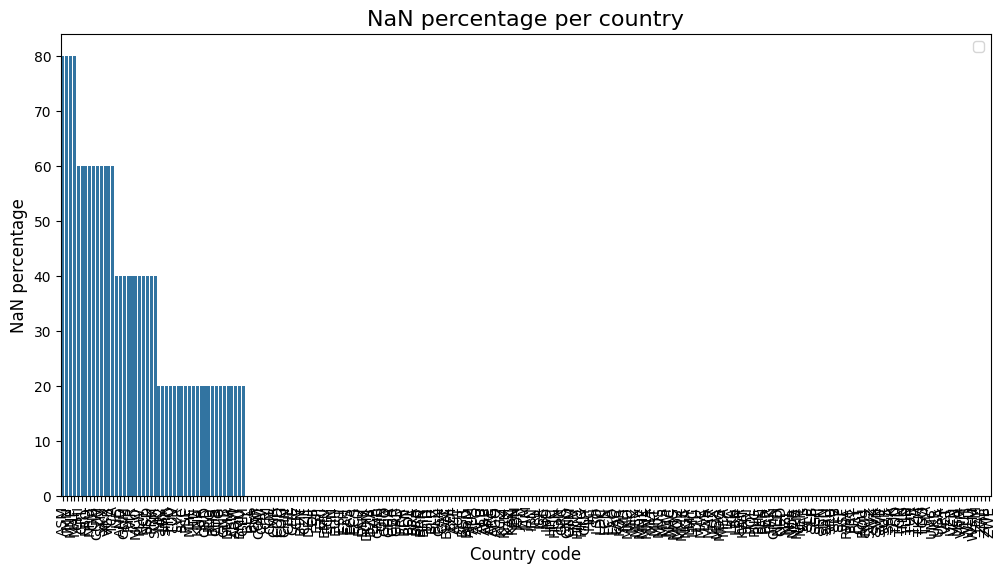

In [40]:

# CREATE A BAR PLOT OF NAN PERCENTAGES BY COUNTRY
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=POURCENTAGE_NAN_LIGNE.index, y=POURCENTAGE_NAN_LIGNE.values, ax=ax)

ax.set_title('NaN percentage per country', fontsize=16)
ax.set_xlabel('Country code', fontsize=12)
ax.set_ylabel('NaN percentage', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # tick rotation on x axis

ax.legend()

plt.show()

WE OBSERVE THAT SOME COUNTRIES APPEAR TO HAVE FEW MISSING VALUES. WE WILL FOCUS OUR EFFORTS ON THESE COUNTRIES

In [41]:
# CALCULATE NAN PERCENTAGES
POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1)


# COUNT COUNTRIES WITH LESS THAN OR EQUAL TO 1% NAN VALUES
pays_complet = np.sum(POURCENTAGE_NAN_LIGNE <= 1)


print(f"Numbers of fully filled countries: {pays_complet}")


Numbers of fully filled countries: 194


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18068\969408562.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1)


WE HAVE IDENTIFIED 194 COUNTRIES WITH COMPLETE INFORMATION

In [42]:

# CALCULATE NaN percentage for each rows
nan_percentage = DF_pivot.isnull().mean(axis=1) * 100

# CREATE A Boolean mask for COUNTRIES WITH LESS THAN OR EQUAL TO 10% NAN VALUES 
mask = nan_percentage <= 10

# APPLY THE MASK TO KEEP THE SELECTED COUNTRIES
DF_pivot_cleaned = DF_pivot[mask]

print(f"At this step, we've retained {round(len(DF_pivot_cleaned)*100/len(DF_pivot),2)} % of the countries")

At this step, we've retained 80.17 % of the countries


In [43]:
DF_pivot_cleaned

Indicator Name,Country Code,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
1,AFG,5.815309e+10,6.322909,8.360000,5.166116e+06
2,AGO,1.651242e+11,8.220000,6.200000,1.964135e+06
3,ALB,3.130790e+10,56.841778,15.520000,8.402830e+05
5,ARB,5.632473e+12,33.530196,11.439652,7.201606e+07
6,ARE,5.777258e+11,86.379998,4.060000,1.335312e+05
...,...,...,...,...,...
236,WSM,1.100068e+09,17.165900,8.140000,5.176000e+04
238,YEM,9.420280e+10,19.797382,17.320000,3.658277e+06
239,ZAF,6.838833e+11,44.477823,24.800000,1.090054e+07
240,ZMB,5.573077e+10,16.073640,8.920000,7.837278e+05


In [44]:
DF_pivot_cleaned=DF_pivot_cleaned.reset_index()

In [45]:
DF_pivot_cleaned=DF_pivot_cleaned.drop(['index'], axis=1)

In [46]:
DF_Final=DF_pivot_cleaned.merge(Fichier_Country[['Country Code','Short Name']],on='Country Code')
DF_Final

,Country Code,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible,Short Name
0,ALB,3.130790e+10,56.841778,15.52,8.402830e+05,Albania
1,ARG,8.471022e+11,59.888613,7.20,1.149748e+07,Argentina
2,ARM,2.305769e+10,45.025037,17.56,6.162849e+05,Armenia
3,AUS,1.030607e+12,82.100343,5.64,6.132435e+06,Australia
4,AUT,4.044068e+11,80.864951,5.22,1.813012e+06,Austria
...,...,...,...,...,...,...
80,USA,1.677570e+13,72.676733,7.18,6.857395e+07,United States
81,UZB,1.597255e+11,29.460000,8.96,8.597438e+06,Uzbekistan
82,VCT,1.151082e+09,43.874000,18.28,1.047360e+04,St. Vincent and the Grenadines
83,VEN,5.337450e+11,52.607866,7.36,4.922530e+06,Venezuela


In [47]:
print(f"At this point, we are left with only {round(85*100/242,2)}% of the countries \ndue to a lack of similarity between country codes in the two tables")

At this point, we are left with only 35.12% of the countries 
due to a lack of similarity between country codes in the two tables


In [48]:
Seri=DF_Final['Short Name']
DF_Final=DF_Final.drop(['Short Name'],axis=1)
DF_Final.insert(1,'Short Name',Seri)
DF_Final

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
0,ALB,Albania,3.130790e+10,56.841778,15.52,8.402830e+05
1,ARG,Argentina,8.471022e+11,59.888613,7.20,1.149748e+07
2,ARM,Armenia,2.305769e+10,45.025037,17.56,6.162849e+05
3,AUS,Australia,1.030607e+12,82.100343,5.64,6.132435e+06
4,AUT,Austria,4.044068e+11,80.864951,5.22,1.813012e+06
...,...,...,...,...,...,...
80,USA,United States,1.677570e+13,72.676733,7.18,6.857395e+07
81,UZB,Uzbekistan,1.597255e+11,29.460000,8.96,8.597438e+06
82,VCT,St. Vincent and the Grenadines,1.151082e+09,43.874000,18.28,1.047360e+04
83,VEN,Venezuela,5.337450e+11,52.607866,7.36,4.922530e+06


WE NOW HAVE A DATAFRAME CONTAINING COUNTRY CODE, COUNTRY SHORT NAME AND OUR 4 SELECTED INDICATORS

## STATISTICAL INDICATORS

TO BEGIN WITH, WE WILL EXAMINE BASIC STATISTICAL INDICATORS SUC AS MIN, MAX, MEAN AND MEDIAN VALUES

In [49]:
for col in DF_Final.columns:
    if DF_Final[col].dtype in ['int64','float64']:
        if DF_Final[col].min()>1000000:print(f'Min of {col} : {round(DF_Final[col].min()/1000000,2)} Millions')
        else:print(f'Min of {col} : {round(DF_Final[col].min(),2)}')
        if DF_Final[col].max()>1000000:print(f'Max of {col} : {round(DF_Final[col].max()/1000000,2)} Millions')
        else:print(f'Max of {col} : {round(DF_Final[col].max(),2)}')
        if DF_Final[col].mean()>1000000:print(f'Mean of {col} : {round(DF_Final[col].mean()/1000000,2)} Millions')
        else:print(f'Mean of {col} : {round(DF_Final[col].mean(),2)}')
        if DF_Final[col].median()>1000000:print(f'Median of {col} : {round(DF_Final[col].median()/1000000,2)} Millions')
        else:print(f'Median of {col} : {round(DF_Final[col].median(),2)}')
        if DF_Final[col].std()>1000000:print(f'Standard deviation of {col} : {round(DF_Final[col].std()/1000000,2)} Millions')
        else:print(f'Standard deviation of {col} : {round(DF_Final[col].std(),2)}')
        print()

Min of GDP, PPP (current international $) : 1151.08 Millions
Max of GDP, PPP (current international $) : 16775703.0 Millions
Mean of GDP, PPP (current international $) : 696276.18 Millions
Median of GDP, PPP (current international $) : 171521.1 Millions
Standard deviation of GDP, PPP (current international $) : 1971421.8 Millions

Min of Internet users (per 100 people) : 9.8
Max of Internet users (per 100 people) : 96.79
Mean of Internet users (per 100 people) : 62.33
Median of Internet users (per 100 people) : 64.81
Standard deviation of Internet users (per 100 people) : 20.84

Min of Unemployment, total (% of total labor force) : 0.34
Max of Unemployment, total (% of total labor force) : 29.1
Mean of Unemployment, total (% of total labor force) : 9.01
Median of Unemployment, total (% of total labor force) : 7.2
Standard deviation of Unemployment, total (% of total labor force) : 5.89

Min of Population Cible : 10473.6
Max of Population Cible : 68.57 Millions
Mean of Population Cible 

### LOGARITHMIC TRANSFORMATION OF SELECTED INDICATORS

THE VALUES OF GDP AND POPULATION CIBLE ARE EXPRESSED IN POWER OF TEN UNITY. 

WE WILL APPLY A LOGARITHMIC TRANSFORMATION TO FLATTEN THE DISTRIBUTION OF THESE VALUES

In [50]:
DF_Final['GDP, PPP (current international $)']=np.log(DF_Final['GDP, PPP (current international $)'])

In [51]:
DF_Final['Population Cible']=np.log(DF_Final['Population Cible'])
DF_Final

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
0,ALB,Albania,24.167136,56.841778,15.52,13.641494
1,ARG,Argentina,27.465087,59.888613,7.20,16.257639
2,ARM,Armenia,23.861265,45.025037,17.56,13.331465
3,AUS,Australia,27.661169,82.100343,5.64,15.629102
4,AUT,Austria,26.725687,80.864951,5.22,14.410500
...,...,...,...,...,...,...
80,USA,United States,30.450953,72.676733,7.18,18.043423
81,UZB,Uzbekistan,25.796723,29.460000,8.96,15.966975
82,VCT,St. Vincent and the Grenadines,20.863968,43.874000,18.28,9.256613
83,VEN,Venezuela,27.003184,52.607866,7.36,15.409333


### STANDARD SCALE

WE WILL NOW APPLY A STANDARD SCALER TO OUR NUMERIC FEATURES

In [52]:
# SELECT THE FEATURES TO SCALE
colonnes_a_normaliser=[]
for col in DF_Final.columns:
    if col not in ['Country Code','Short Name']:
        colonnes_a_normaliser.append(col)
print("Columns to normalize :")
for col in colonnes_a_normaliser:
    print(col)

Columns to normalize :
GDP, PPP (current international $)
Internet users (per 100 people)
Unemployment, total (% of total labor force)
Population Cible


In [53]:
# IMPORT STANDARD SCLAER FROM SCIKIT LEARN LIBRARY
from sklearn.preprocessing import StandardScaler

In [54]:
# SCALER DEFINITION
scaler=StandardScaler()

In [55]:
# CREATE THE FINAL DATAFRAME 
DF_Final[colonnes_a_normaliser] = scaler.fit_transform(DF_Final[colonnes_a_normaliser])

In [56]:
DF_Final

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
0,ALB,Albania,-0.831991,-0.264872,1.110867,-0.231819
1,ARG,Argentina,0.926633,-0.117798,-0.309192,1.249483
2,ARM,Armenia,-0.995096,-0.835279,1.459054,-0.407363
3,AUS,Australia,1.031193,0.954386,-0.575453,0.893596
4,AUT,Austria,0.532350,0.894752,-0.647139,0.203604
...,...,...,...,...,...,...
80,USA,United States,2.518838,0.499498,-0.312606,2.260622
81,UZB,Uzbekistan,0.036982,-1.586619,-0.008795,1.084905
82,VCT,St. Vincent and the Grenadines,-2.593397,-0.890840,1.581944,-2.714607
83,VEN,Venezuela,0.680324,-0.469247,-0.281883,0.769159


### BOXPLOT AND DISTRIBUTION

WE WILL NOW CREATE BOXPLOT AND DISTRIBUTION

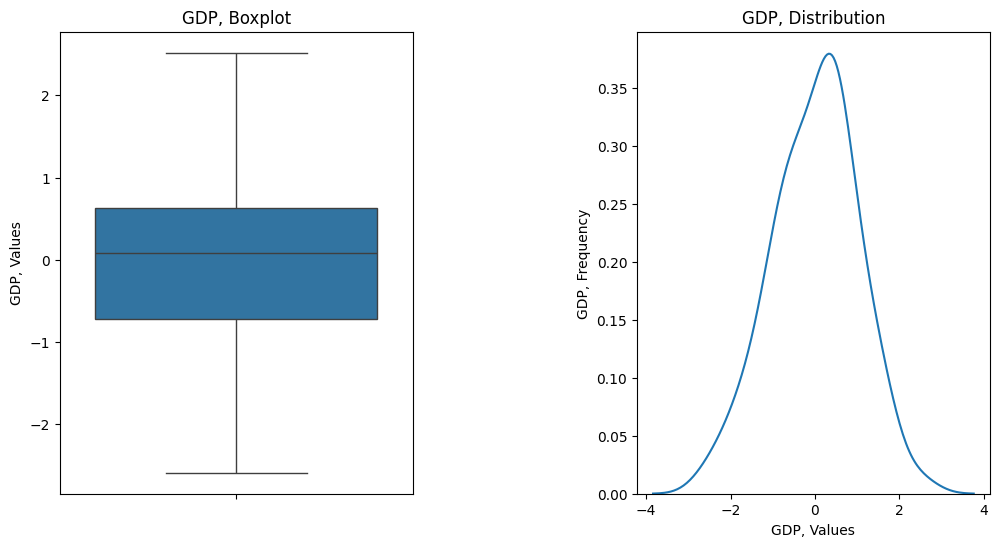

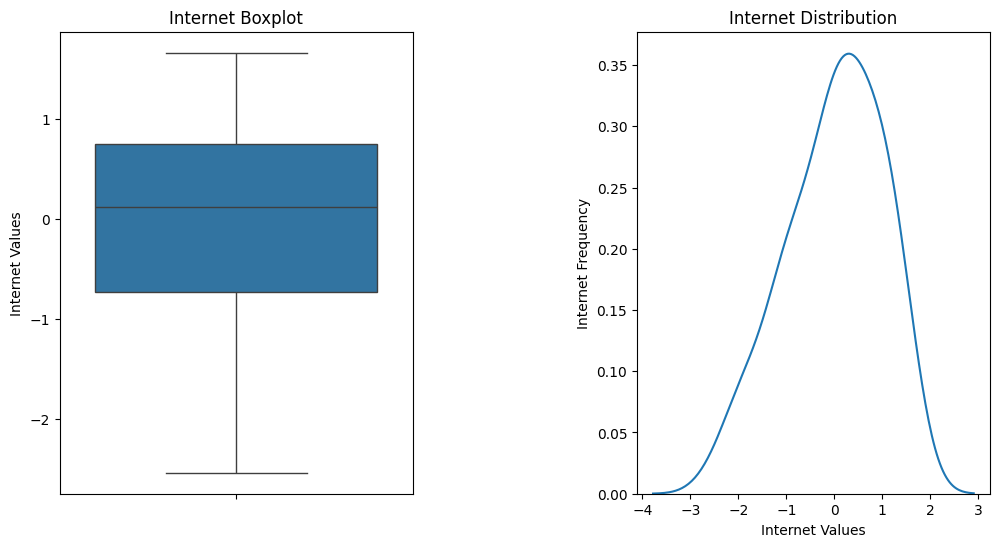

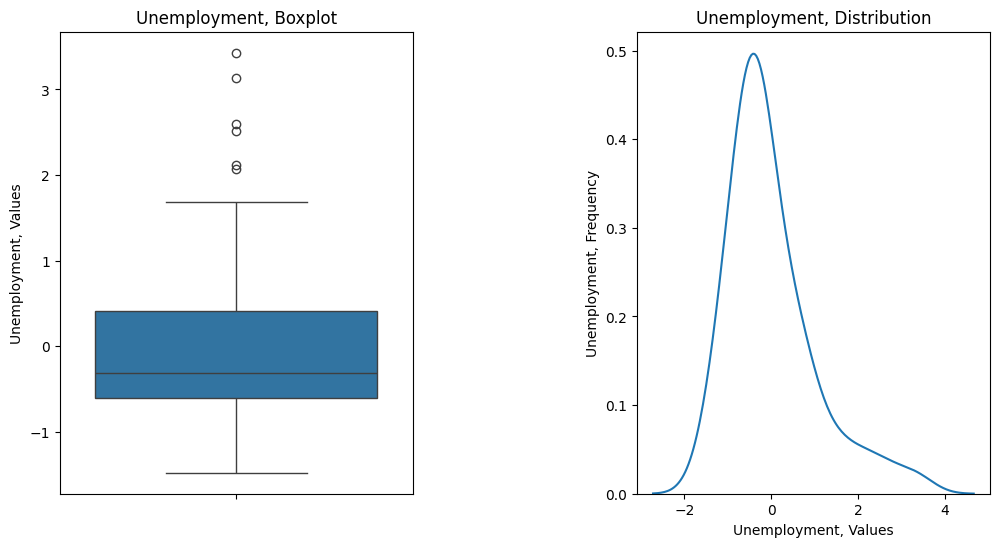

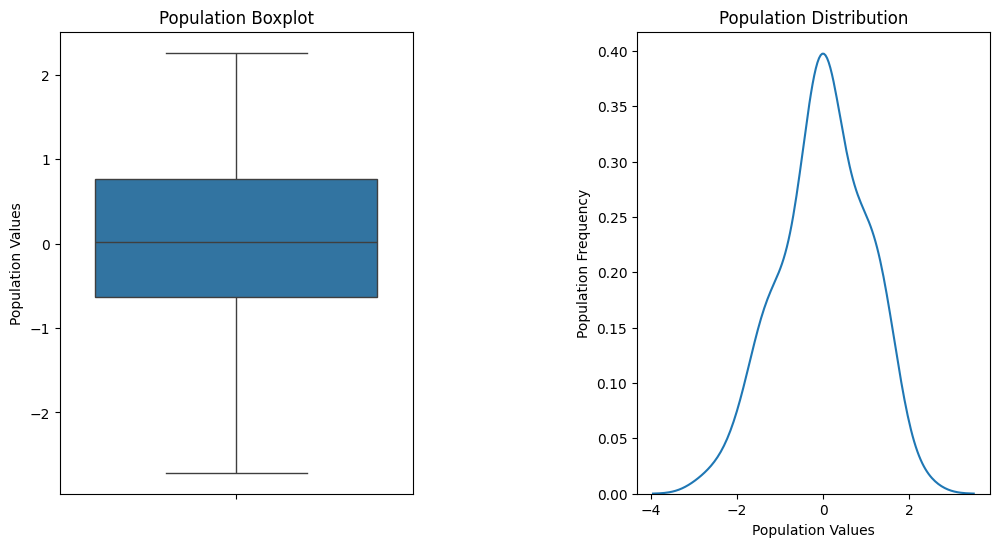

In [57]:
# CREATE MOSAIC LAYOUT FOR SUBPLOTS

for col in DF_Final.columns:
    if col not in ['Country Code','Short Name']:
        layout="""
        AACBB
        AACBB

        """

        fig,axd = plt.subplot_mosaic(layout,figsize=(12,6),dpi=100)
        
        #CREATE BOXPLOT

        sns.boxplot(y=DF_Final[col],ax=axd['A'])
        axd['A'].set_title(f'{col.split(' ')[0]} Boxplot')
        axd['A'].set_ylabel(f'{col.split(' ')[0]} Values')

        # CREATE DENSITY PLOT

        sns.kdeplot(DF_Final[col],ax=axd['B'])
        axd['B'].set_title(f'{col.split(' ')[0]} Distribution')
        axd['B'].set_xlabel(f'{col.split(' ')[0]} Values')
        axd['B'].set_ylabel(f'{col.split(' ')[0]} Frequency')

        axd['C'].axis('off')
        plt.show()

### CORRELATION HEATMAP

WE WILL NOW CREATE A CORRELATION HEATMAP

In [58]:
# CREATE A CORRELATION MATRIX
Mat_corr=DF_Final.drop(['Country Code','Short Name'],axis=1).corr(method='spearman')
Mat_corr

,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
"GDP, PPP (current international $)",1.000000,0.364295,-0.265998,0.874145
Internet users (per 100 people),0.364295,1.000000,-0.259793,0.017549
"Unemployment, total (% of total labor force)",-0.265998,-0.259793,1.000000,-0.106763
Population Cible,0.874145,0.017549,-0.106763,1.000000


A CORRELATION VALUE OF 1 INDICATES A STRONG POSITIVE CORRELATION (WHEN ONE FEATURE INCREASES, THE OTHER INCREASES PROPORTIONALLY)

A CORRELATION VALUE OF -1 INDICATES A STRONG NEGATIVE CORRELATION (WHEN ONE FEATURE INCREASES, THE OTHER DECREASES PROPORTIONALY)

CREATING A HEATMAP TO VISUALIZE THE CORRELATIONS MORE EFFECTIVELY

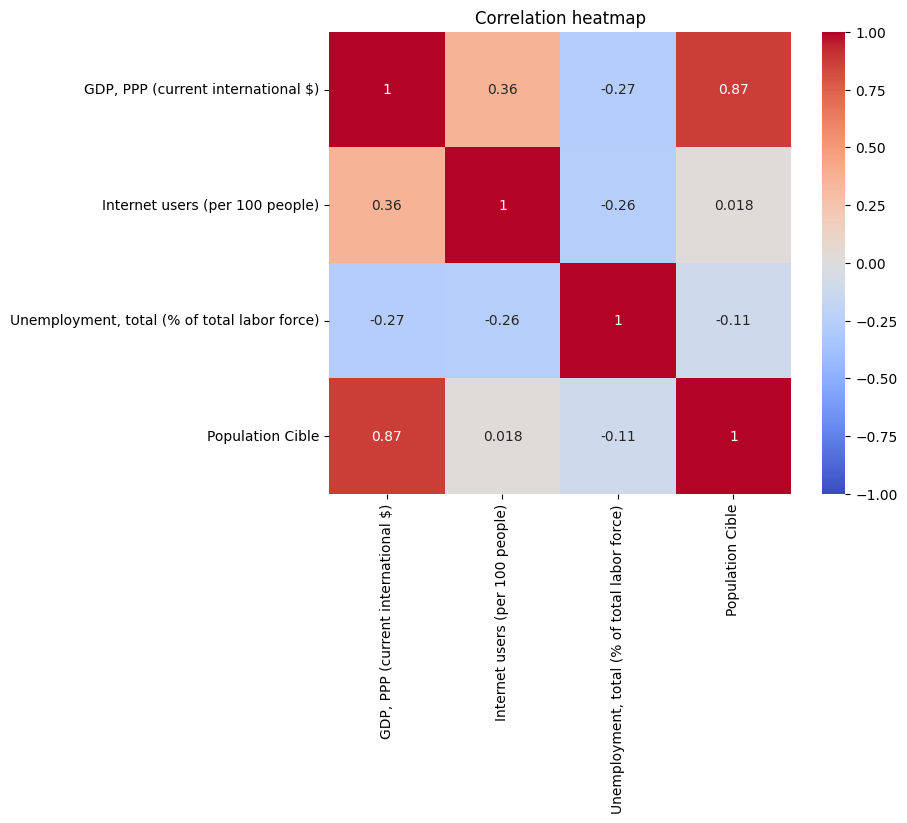

In [59]:
fig,ax = plt.subplots(figsize=(8,6))

heatmap=sns.heatmap(Mat_corr,
                    annot=True, # DISPLAY VALUES IN EACH CELL
                    cmap='coolwarm', # COLOR PALETTE
                    vmin=-1,vmax=1, #SET COLOR SCALE FROM -1 TO 1
                    center=0, # CENTER COLOR PALETTE AT 0 
                    square=True, # ENSURE CELLS ARE SQUARE
                    ax=ax)

plt.title('Correlation heatmap')
plt.show()

### CREATION OF THE COMPOSITE SCORE

WE WILL CREATE A NEW FEATURE CALLED "Score" TO CLASSIFY THE COUNTRIES

In [60]:
DF_Final['Score']=DF_Final['GDP, PPP (current international $)']
+DF_Final['Internet users (per 100 people)']
+DF_Final['Population Cible']
-DF_Final['Unemployment, total (% of total labor force)']

0    -1.110867
1     0.309192
2    -1.459054
3     0.575453
4     0.647139
        ...   
80    0.312606
81    0.008795
82   -1.581944
83    0.281883
84    1.203556
Name: Unemployment, total (% of total labor force), Length: 85, dtype: float64

### CREATION OF THE INTERACTIVE MAP

In [61]:
import geopandas as gpd

# Load world geographic data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print("The following countries do not appear into geopandas' world name list and need to be modified")
for pays in DF_Final['Short Name']:
    if pays not in world['name'].unique():
        print(pays)

The following countries do not appear into geopandas' world name list and need to be modified
Bahrain
Bosnia and Herzegovina
Barbados
Cabo Verde
Czech Republic
Hong Kong SAR, China
Kyrgyz Republic
Korea
St. Lucia
Macao SAR, China
Maldives
Malta
Mauritius
Singapore
Slovak Republic
United States
St. Vincent and the Grenadines


SOME COUNTRIES SUCH AS MALTA, HONG KONG ARE NOT PRESENT IN THE GEOPANDAS WORLD NAMES DATASET

OTHER COUNTRY NAMES NEED TO BE MODIFIED TO MATCH THE DATASET, FOR EXAMPLE KOREA TO SOUTH KOREA OR CZECH REPUBLIC TO CZECHIA

In [62]:
DF_Final.loc[DF_Final['Country Code']=='KOR','Short Name']='South Korea'
DF_Final.loc[DF_Final['Short Name']=='Czech Republic','Short Name']='Czechia'
DF_Final.loc[DF_Final['Short Name']=='Kyrgyz Republic','Short Name']='Kyrgyzstan'
DF_Final.loc[DF_Final['Short Name']=='Slovak Republic','Short Name']='Slovakia'
DF_Final.loc[DF_Final['Short Name']=='United States','Short Name']='United States of America'
DF_Final.loc[DF_Final['Short Name']=='Bosnia and Herzegovina','Short Name']='Bosnia and Herz.'


DF_Final

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible,Score
0,ALB,Albania,-0.831991,-0.264872,1.110867,-0.231819,-0.831991
1,ARG,Argentina,0.926633,-0.117798,-0.309192,1.249483,0.926633
2,ARM,Armenia,-0.995096,-0.835279,1.459054,-0.407363,-0.995096
3,AUS,Australia,1.031193,0.954386,-0.575453,0.893596,1.031193
4,AUT,Austria,0.532350,0.894752,-0.647139,0.203604,0.532350
...,...,...,...,...,...,...,...
80,USA,United States of America,2.518838,0.499498,-0.312606,2.260622,2.518838
81,UZB,Uzbekistan,0.036982,-1.586619,-0.008795,1.084905,0.036982
82,VCT,St. Vincent and the Grenadines,-2.593397,-0.890840,1.581944,-2.714607,-2.593397
83,VEN,Venezuela,0.680324,-0.469247,-0.281883,0.769159,0.680324


WE WILL REMOVE THE ROWS CORRESPONDING TO COUNTRIES THAT DO NOT EXIST IN THE GEOPANDAS LIST

In [63]:
Country_to_remove = ['Bahrain','Barbados','Cabo Verde','Hong Kong SAR, China','St. Lucia','Macao SAR, China','Maldives',
                  'Malta','Mauritius','Singapore','St. Vincent and the Grenadines']
DF_Final=DF_Final[~DF_Final['Short Name'].isin(Country_to_remove)]
DF_Final=DF_Final.reset_index()
DF_Final=DF_Final.drop(['index'],axis=1)
print(f"We've eliminated {round(11*100/242,2)} % of country from the original Dataframe ")



We've eliminated 4.55 % of country from the original Dataframe 


In [64]:
DF_Final

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible,Score
0,ALB,Albania,-0.831991,-0.264872,1.110867,-0.231819,-0.831991
1,ARG,Argentina,0.926633,-0.117798,-0.309192,1.249483,0.926633
2,ARM,Armenia,-0.995096,-0.835279,1.459054,-0.407363,-0.995096
3,AUS,Australia,1.031193,0.954386,-0.575453,0.893596,1.031193
4,AUT,Austria,0.532350,0.894752,-0.647139,0.203604,0.532350
...,...,...,...,...,...,...,...
69,URY,Uruguay,-0.423852,-0.212744,-0.408187,-0.279353,-0.423852
70,USA,United States of America,2.518838,0.499498,-0.312606,2.260622,2.518838
71,UZB,Uzbekistan,0.036982,-1.586619,-0.008795,1.084905,0.036982
72,VEN,Venezuela,0.680324,-0.469247,-0.281883,0.769159,0.680324


WE WILL NOW CREATE AN INTERACTIVE MAP AND COLOR THE COUNTRIES BASED ON THEIR SCORE VALUES

In [65]:
import folium


# Load world geographic data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Merging our data with world geodataframe
world = world.merge(DF_Final, left_on='name', right_on='Short Name', how='left')

# Create the map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add choropleth layer for countries with data
Choropleth = folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=world,
    columns=['name', 'Score'],
    key_on='feature.properties.name',
    fill_color='viridis',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Score'
).add_to(m)



# Add GeoJson layer with country borders and tooltip 
folium.GeoJson(
    world,
    style_function=lambda feature: {
        'fillColor': 'white' if pd.isna(feature['properties']['Score']) else 'transparent',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.9 if pd.isna(feature['properties']['Score']) else 0.1,
    },
    tooltip=folium.GeoJsonTooltip(fields=['name', 'Score'], aliases=['Pays', 'Score'], localize=True)
).add_to(m)

# Add a Layer control
folium.LayerControl().add_to(m)


### MAP OF THE TOP 74 COUNTRIES (APPROXIMATELY 31% OF THE INITIAL COUNTRIES)

In [66]:

# Show interactive map
m


In [67]:
m.save("world_map.html")